# NLP preprocessing 
#### Here we are doing all nlp work 

In [45]:
# importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')
import pickle
# custom fuctions

# NLP libraries
import nltk
from sklearn.feature_extraction import text 
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords

In [46]:
# loading in clean_df
clean_df = pd.read_pickle(r'C:\Users\Lalit\Documents\AI_sentimentAnalysis\clean_df_new.pkl')
clean_df.head()

,total_votes,hate_speech_votes,other_votes,label,tweet,clean_tweets
0,NaN,NaN,3,1,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldnt complain about clea...
1,NaN,NaN,3,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats coldtyga dwn bad for cuffin dat ho...
2,NaN,NaN,3,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she sta to...
3,NaN,NaN,3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranny
4,NaN,NaN,6,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,the shit you hear about me might be true or...


In [51]:
# assigning variables to essential columns
data = clean_df['clean_tweets']
target = clean_df['label']
data

0           as a woman you shouldnt complain about clea...
1           boy dats coldtyga dwn bad for cuffin dat ho...
2           dawg   you ever fuck a bitch and she sta to...
3                                   she look like a tranny
4           the shit you hear about me might be true or...
                               ...                        
25291    yous a muthafin lie    right his tl is trash  ...
25292    youve gone and broke the wrong hea baby and dr...
25294    young buck wanna eat dat nigguh like i aint fu...
25295                youu got wild bitches tellin you lies
25296    ruffled  ntac eileen dahlia  beautiful color c...
Name: clean_tweets, Length: 24783, dtype: object

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
# setting NLTK stop words as `stop_words`
stop_words = set(stopwords.words('english'))

In [48]:
def process_tweet(text):
    """tokenize text in each column and remove stop words"""
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
def process_tweet(text):
    """tokenize text in each column and remove stop words"""
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed 

In [53]:
# applying the above function to our `clean_tweets`
processed_data = list(map(process_tweet, data))

In [54]:
# getting count of all unique words in the corpus
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

20277

In [11]:
# transforming `processed_data` into a readable list
flat_filtered = [item for sublist in processed_data for item in sublist]
# getting frequency distribution
clean_corpus_freqdist = FreqDist(flat_filtered)
# top 20 words in cleaned corpus
clean_corpus_freqdist.most_common(20)

[('bitch', 8227),
 ('bitches', 3083),
 ('like', 2766),
 ('hoes', 2368),
 ('pussy', 2099),
 ('im', 2061),
 ('hoe', 1906),
 ('dont', 1749),
 ('got', 1597),
 ('ass', 1570),
 ('get', 1428),
 ('fuck', 1411),
 ('u', 1280),
 ('shit', 1262),
 ('nigga', 1198),
 ('aint', 1158),
 ('trash', 1142),
 ('lol', 1074),
 ('know', 806),
 ('niggas', 791)]

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:
# creating a list with all lemmatized outputs
lemmatizer = WordNetLemmatizer() 
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [56]:
X_lem = lemmatized_output
y_lem = target
y_lem

0        1
1        0
2        0
3        0
4        0
        ..
25291    0
25292    1
25294    0
25295    0
25296    1
Name: label, Length: 24783, dtype: int64

In [57]:
with open('X_lem.pkl', 'wb') as files:
    pickle.dump(X_lem, files)

In [18]:
from sklearn.model_selection import train_test_split
# initial TTS
X_train, X_test, y_train, y_test = train_test_split(X_lem, y_lem, test_size=0.20, random_state=15)
count = 0;
X_train

['hate bird piss fact cant fly',
 'double tap imma honest hoe honest hoe',
 'post picture woman hoe jumping bridge tonight lol',
 'weeknds fan person half hoea quaer gothic quaer hipster',
 'lol nah hoe dealt yall rxtjwwkfhj',
 'lashontae bad bitch time',
 'karma bitch genuinely mean',
 'mf tell gm damn near every mornin bitch dont even tell gm wide tf awoke wtf type shit',
 'lmfao bitch talking',
 'wait take brownie',
 'son bitch took tic tacs like movie',
 'bitch nan',
 'big titty bitch lmao fuck good pay',
 'skinny young nigga n im finer bitch',
 'always interesting see people trash la liga react product la liga premier league club',
 'bitch wan na get slick',
 'bitch nigga owe money',
 'boy said last night ill gym bc refuse sloppy like bad built bitch lol',
 'druggys hoe got ta dopest video ever',
 'first day spring break ate half pan brownie watched episode park rec',
 'bob marley wrote peace hoe remember smoking blunt',
 'really dont give fuck sta got hoe fuck bitch shit im delet

In [23]:
# instantiating tf_idf vectorizer
tfidf = TfidfVectorizer(stop_words= stop_words, ngram_range=(1,2))

In [24]:
from sklearn.model_selection import train_test_split
# transforming tokenized data into sparse matrix format with 20K stored elements
X_tfidf = tfidf.fit_transform(X_lem)
# X_test_tfidf = tfidf.transform(X_test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_lem, test_size=0.3, random_state=15)

In [23]:
# # taking a quick look at the non zero elements
# non_zero_cols = X_train_tfidf.nnz / float(X_train_tfidf.shape[0])
# print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))
# percent_sparse = 1 - (non_zero_cols / float(X_train_tfidf.shape[1]))
# print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

In [25]:
# Here, we can see that 99.9% of the columns contain a zero, meaning that's a very sparse matrix with 20K columns. 
# We know the amount of columns because it's the size of the total corpus vocabulary. 
# Additionally, it seems that the average length of the individual tweets is 13 wordx
# X_train_tfidf

In [25]:
from sklearn.naive_bayes import MultinomialNB
baseline_bayes = MultinomialNB(alpha = .01)

In [26]:


%%time
baseline_bayes.fit(X_train, y_train)
bayes_test_preds = baseline_bayes.predict(X_test)



Wall time: 31.3 ms


In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test, bayes_test_preds))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82      6995
           1       0.12      0.60      0.20       440

    accuracy                           0.71      7435
   macro avg       0.54      0.66      0.51      7435
weighted avg       0.92      0.71      0.78      7435



<AxesSubplot:>

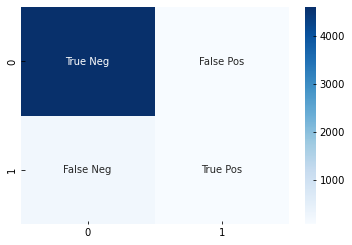

In [70]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, bayes_test_preds)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm,annot=labels, fmt='', cmap="Blues")

In [23]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [24]:
# creating a finder & passing in tokenized corpus
bigram_finder = BigramCollocationFinder.from_words(flat_filtered)

In [25]:
# computing bigram scores
corpus_scored = bigram_finder.score_ngrams(bigram_measures.raw_freq)

In [26]:
corpus_scored[:20]

[(('wan', 'na'), 0.0018295365531745946),
 (('got', 'ta'), 0.001657849838507184),
 (('gon', 'na'), 0.0015666412713401222),
 (('bitch', 'ass'), 0.0012769199403388667),
 (('like', 'bitch'), 0.0011910765830051614),
 (('bitch', 'im'), 0.001169615743671735),
 (('look', 'like'), 0.0010837723863380297),
 (('ass', 'bitch'), 0.0010730419666713166),
 (('yo', 'bitch'), 0.0010301202880044638),
 (('bad', 'bitch'), 0.0009711029798375415),
 (('bitch', 'dont'), 0.0009603725601708283),
 (('bad', 'bitches'), 0.0007672250061699913),
 (('bitch', 'bitch'), 0.0007618597963366347),
 (('ass', 'nigga'), 0.0007135729078364255),
 (('hoes', 'aint'), 0.0006921120685029991),
 (('bitch', 'got'), 0.000681381648836286),
 (('fuck', 'bitch'), 0.000681381648836286),
 (('bitch', 'aint'), 0.0006706512291695728),
 (('little', 'bitch'), 0.0006652860193362163),
 (('bitch', 'nigga'), 0.0005687122423357978)]

In [20]:
X_test_tfidf

<4957x104342 sparse matrix of type '<class 'numpy.float64'>'
	with 44963 stored elements in Compressed Sparse Row format>

In [37]:
vectorizer = CountVectorizer()
  
vectorizer.fit(X_train)
  
# # Printing the identified Unique words along with their indices
# print("Vocabulary: ", vectorizer.vocabulary_)
  
# Encode the Document
X_train_count = vectorizer.transform(X_train)
  
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(X_train_count.toarray())

Encoded Document is:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [38]:
vectorizer = CountVectorizer()
  
vectorizer.fit(X_test)
  
# # Printing the identified Unique words along with their indices
# print("Vocabulary: ", vectorizer.vocabulary_)
  
# Encode the Document
X_test_count = vectorizer.transform(X_test)
  
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(X_test_count.toarray())

Encoded Document is:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [40]:
sentence = ['We have to kill all the Palestinians unless they are resigned to live here as slaves']
            
tokens = process_tweet(sentence[0])
    

In [41]:
def listToString(s): 
    
    # initialize an empty string 
    string = " "
    
    # return string 
    return (string.join(s)) 
        
        
# Driver code    
s = [listToString(tokens)]
s

['kill palestinians unless resigned live slaves']

In [150]:
# cleaned_token = []
# for word in tokens:
#     if word not in stop_words:
#         cleaned_token.append(word)

In [88]:
# cleaned_token

['happy']

In [115]:
# stemmer = PorterStemmer()
# stemmed = stemmer.stem(word) for word in tokens]

SyntaxError: invalid syntax (Temp/ipykernel_7004/2205767636.py, line 2)

In [90]:
stemmed

['happi']

In [31]:
test_tfidf = tfidf.transform(s)
test_tfidf

<1x125273 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [32]:
test_pre = baseline_bayes.predict(test_tfidf)

In [33]:
test_pre

array([0], dtype=int64)

In [47]:
c = 0
for i in y_test :
    if i == 0 :
        c = c+1
print(c)

279


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_lem, y_lem, test_size=0.20, random_state=20)

# using count vectorizor
count = CountVectorizer(stop_words=stop_words)

# fitting to the train and test set
X_train_count = count.fit_transform(X_train)
X_test_count = count.transform(X_test)



In [35]:
baseline_bayes = MultinomialNB(alpha = .01)

baseline_bayes.fit(X_train_count, y_train)
bayes_test_preds = baseline_bayes.predict(X_test_count)


In [39]:
print(classification_report(y_test, bayes_test_preds))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4683
           1       0.45      0.24      0.31       274

    accuracy                           0.94      4957
   macro avg       0.70      0.61      0.64      4957
weighted avg       0.93      0.94      0.93      4957



<AxesSubplot:>

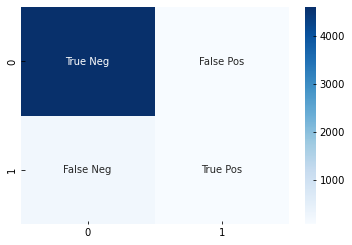

In [73]:
cfm = confusion_matrix(y_test, bayes_test_preds)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm,annot=labels, fmt='', cmap="Blues")

In [42]:
test_count = count.transform(s)
test_pre = baseline_bayes.predict(test_count)

In [43]:
test_pre
# 0 - not hate speech 
# 1 - hate speech

array([1], dtype=int64)

In [51]:
print(baseline_bayes.get_params())

{'alpha': 0.01, 'class_prior': None, 'fit_prior': True}


In [55]:
from sklearn import linear_model
lgreg_clf = linear_model.LogisticRegression(penalty='none')
lgreg_clf.fit(X_train_count,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

In [56]:
with open('model_nb.pkl', 'wb') as files:
    pickle.dump(baseline_bayes, files)

In [57]:
# load saved model
with open('model_nb.pkl' , 'rb') as f:
    b_nb = pickle.load(f)

In [59]:
b_nb.predict(test_count)

array([0], dtype=int64)

In [44]:
with open('test_count.pkl', 'wb') as files:
    pickle.dump(test_count, files)